# Fan Morphometry – Lab #2 – GEOG 498/ Basin and Range

This laboratory exercise builds upon the field work completed in Death Valley as
part of  GEOG-333 activities. The purpose of the lab is to understand lithologic, 
tectonic and morphometric controls of alluvial fan development. 

Materials needed:

1. Shape file of fan catchments with attributes such as min, max elevation [$m$] slope [$^{\circ}$] and area [$m^{2}$] 
2. Google Earth Pro (everyone should be able to access this software as it’s free)
3. Google Earth map of [Death Valley](https://mrdata.usgs.gov/geology/state/kml/cageol.kmz).            **note**: If you prefer a real paper map of the valley you can get that [here](ftp://ftp.consrv.ca.gov/pub/dmg/pubs/gam/GAM_004_Death_Valley/GAM_004_Map_1974.pdf).


## What we need to do


1. Start Google Earth and open the fan catchment area shape file.  Notice that selecting one of the polygons by clicking on it will yield catchment attributes (see point (a) above). 
2. In Google Earth digitize the fan area below each contributing catchment. For some catchments with coalescing fans you’ll have to do your best to project likely fan area. 
3. Use graphing software (or the python code below), examine the relation between:
  1. catchment area vs. fan area; 
  2. average slope of catchment area vs. fan area; 
  3. relief of catchment area vs. fan area. 
        
  Be certain that your plots are labeled with appropriate axes labels and titles.  

4. Melton (1965) proposed that a dimensionless number called the ruggedness number (Rn) could be used to explain fan size. Rn is defined as: $R_{n} = \frac{H}{\sqrt{A}}$ where H is the catchment relief [m] and A is the catchment area [$m^{2}$]. Is $R_{n}$ any better in terms of predicting fan area for Death Valley fans?

5. Consult the Geologic maps of Death Valley. Does geology or faults play any role in fan size or location?

6. Finally, consider the apparent asymmetry of fans that terminate in the vicinity of Badwater. What could explain why western fans are such much larger than those on the eastern side of the valley?


## Those wanting to use python 

Let's first import some modules we'll need

In [25]:
%matplotlib inline
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
import matplotlib.pyplot as plt
from matplotlib import *


In [40]:
## open up fan shape file
path = '/Users/menounos/Desktop/Teaching/GEOG333/Field_activities/2_Fan_morphometry/'
## https://github.com/bmenounos/field_course/blob/master/data/fan_watersheds.shp
file  = 'fan_watersheds.shp'
## database file
file2 = 'fan_watersheds.dbf'

shp = ps.open(path + file)
dbf = ps.open(path + file2)

## create a dictionary (variable names and associated values) for each column
## and then convert to a Pandas dataframe

d = dict([(col, np.array(dbf.by_col(col))) for col in dbf.header])
basins = pd.DataFrame(d)

## make some empty areas to put your calculations in
basins['fan_area'] = basins['basin_area'] * 0.0
basins['basin_relief'] = basins['basin_area'] * 0.0

basins.head()

,basin_area,id,fan_area,basin_relief
0,28956703.31,0,0.0,0.0
1,50774297.06,1,0.0,0.0
2,48755014.50,2,0.0,0.0
3,12853859.92,3,0.0,0.0
4,8827955.86,4,0.0,0.0


In [41]:
## to add values for basin 0's fan area, calculate area in Google Earth and then

## basins['fan_area'] = [ value0, value1, ..., value n]

basins['fan_area'] = 1e6 * np.arange(17)


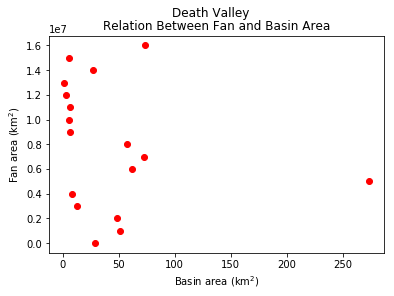

In [44]:
## convert basin area from m2 to km2
basins['basin_area'] = basins['basin_area']*1e-06

## plot fan area versus basin area
plt.plot(basins['basin_area'], basins['fan_area'], 'ro')
plt.xlabel('Basin area (km$^{2}$)')
plt.ylabel('Fan area (km$^{2}$)' )
plt.suptitle('Death Valley')
plt.title('Relation Between Fan and Basin Area')
plt.savefig(path + 'fan_area.pdf', resolution = 600)
plt.show()
